# Introduzione
...

## Pipeline Implementate
...

## Obiettivi
...



# Strumenti per Analisi Del Dataset
In questo capitolo approfondiremo tutte le tecniche che successivamente impiegheremo per l'analisi del dataset. Tra le tecniche di Unsupervised Learning sono presenti la *PCA* e la *Kernel PCA* utilizzate principalmente per la riduzione della dimensionalità a scopo di rendere la computazione più semplice ed eliminare dati non rilevanti. Per quanto riguarda i classificatori che impiegheremo saranno il *Multi-Layer Perceptron* e la *Fischer Discriminant Analysis* ci consentiranno di fare delle predizioni.

## PCA
La **PCA** (Principal Component Analysis) è forse il più importante metodo di riduzione della dimensionalità dei dati all'interno del contesto del **Unsupervised Learning**. La riduzione della dimensionalità è specialmente importante nel contesto del riconoscimento facciale dove ogni immagine raggiunge facilmente le decine di migliagia di pixel: questo comporta un significativo ostacolo per l'addestramento di algoritmi di riconoscimento rendendoli quasi impraticabili per l'enorme quantità di memoria necessaria.
La PCA ci permette queindi di individuare un sottospazio vettoriale *ottimale* di dimensione **inferiore** alla dimensione dei dati iniziale in cui proiettare i dati originali

Il metodo si deriva da due approcci completamente diversi.
### Minimizzare l'errore quadratico medio
Possiamo cercare il sottospazio che minimizza la somma dei quadrati degli errori tra i dati iniziali e i dati proiettati nel sottospazio.

\begin{equation}
\sum_{i=1}^N || x_{i} - \sum_{j=1}^k a_{i,j}e_{i} ||^2
\end{equation}

Dopo di che con semplici manipolazioni algebriche possiamo trasformare il problema nella massimizzazione della funzione:

\begin{equation}
\sum_{i = 0}^k\boldsymbol{e}_{i}^t \boldsymbol{S}  \boldsymbol{e}_{i}
\end{equation}

dove S simmetrica definita positiva è la Scatter Matrix.
A quest'ultimo problema applichiamo il metodo dei moltiplicatori di Lagrange e imponiamo l'ortonormalità della base nella seguente lagrangiana:

\begin{equation}
\sum_{i = 1}^k\boldsymbol{e}_{i}^t \boldsymbol{S} \boldsymbol{e}_{i} - \sum_{j=1}^k \lambda_{j}(\boldsymbol{e}_{j}^t\boldsymbol{e}_{j} - 1)
\end{equation}

a questo punto otteniamo che i moltiplicatori sono gli autovalori e la base sono gli autovettori di S

### Massimizzare la Varianza
Questo approccio è completamente equivalente: cerchiamo le direzioni su cui proiettare i dati che mantengono massima la varianza spiegata V. Iniziando dalla prima direzione abbiamo:

\begin{equation}
V_{1} = 1/N \sum_{j=1}^N (e_{1}^t x_{j})^2 = e_{1}^t C e_{1}
\end{equation}

dove C è la matrice di covarianza campionaria (Scatter Matrix riscalata per il numero di campioni) e e_{j} deve avere norma 1

Risolvendo la lagrangiana otteremo nuovamente che le direzioni di massima varianza sono gli autovettori *ordinati* della matrice di varianza e convarianza campionaria che essendo simmetrica e semidefinita positiva sarà dunque diagonalizzabile secondo ili *Teroema Spettrale* e i suoi autovalori saranno tutti reali e positivi. La varianza cumulata spiegata sarà pari agli autovalori corrispondenti alle direzioni scelte della PCA.

Al terimine di entrambi gli approcci avremo quindi, dopo aver scelto la quantità di varianza che desideriamo preservare o, alternativamente, il numero di componenti principali che vogliamo mantenere, l'elenco in ordine decrescente degli autovalori corrispondenti alle direzioni del nuovo spazio in cui proietteremo i dati.

## MLP
I Multi-Layer Perceptrons sono un particolare tipo di _Neural Network_ chiamato _feedforwrward_(cioè senza ricorsività/cicli nella sua struttura) caratterizzato da una sequenza di _strati completamente connessi_ (_fully-connected layers_, *FC Layers*).

### Funzione caratterizzante del Layer
Ogni Layer $L$ di $m\in\mathbb{N}$ unità con funzione di attivazione $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ e sia $L$ (completamente) connesso con un altro livello di $n$ unità: Il layer $L$ è quindi caratterizzato dalla funzione $\mathcal{L}:\mathbb{R}^n\rightarrow\mathbb{R}^m$ tale che

\begin{equation}
\mathcal{L}(\boldsymbol{x}) := \boldsymbol{\sigma}\left(W\boldsymbol{x} + \boldsymbol{b}\right)\,,\quad \forall \ \boldsymbol{x}\in\mathbb{R}^n\,,
\end{equation}
legenda:
- $W\in\mathbb{R}^{m\times n}$ è la matrice dei pesi del livello $L$;
- $\boldsymbol{b}\in\mathbb{R}^m$ è il vettore dei bias
- $\boldsymbol{\sigma}:\mathbb{R}^m\rightarrow\mathbb{R}^m$ è una funzione vettoriale che applica elemento-per-elemento la funzione $\sigma$.

Un _Input Layer_ di $n\in\mathbb{N}$ unità è un layer che "_legge_" vettori di $\mathbb{R}^n$ e li "_invia_" ai layer successivi con lui connessi.

### Funzione caratterizzante del MLP
preso un MLP fatto da un input layer $L^{(0)}$ di $n\in\mathbb{N}$ elementi, seguito da una sequenza di layers $L^{(1)},\ldots ,L^{(H)}, L^{(H+1)}$ connessi successivamente. Nel dettaglio, i layer $L^{(1)},\ldots ,L^{(H)}$ sono definiti _strati nascosti_ invece $L^{(H+1)}$ è definito _strato di output_.

L'MLP è quindi rappresentato da una funzione $\hat{\boldsymbol{F}}:\mathbb{R}^n\rightarrow \mathbb{R}^m$

\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) : \mathbb{R}^n \xrightarrow[]{\mathcal{L}^{(1)}} \mathbb{R}^{n_1} \xrightarrow[]{\mathcal{L}^{(2)}} \cdots \xrightarrow[]{\mathcal{L}^{(H)}} \mathbb{R}^{n_H}\xrightarrow[]{\mathcal{L}^{(H+1)}}\mathbb{R}^m
\end{equation}

e nello specifico

\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) = \boldsymbol{\sigma}^{(H+1)}\left( W^{(H+1)}\boldsymbol{\sigma}^{(H)}\left(\cdots \left( W^{(2)}\boldsymbol{\sigma}^{(1)}\left(W^{(1)}\boldsymbol{x} + \boldsymbol{b}^{(1)}\right)+\boldsymbol{b}^2\right) \cdots\right)  + \boldsymbol{b}^{(H+1)}\right)\,,\quad \forall \ \boldsymbol{x}\in\mathbb{R}^n\,,
\end{equation}

legenda:
- $W^{(h)}$, $\boldsymbol{b}^{(h)}$, $\sigma^{(h)}$, sono rispettivamente i pesi, i bias e la funzione di attivazione del layer $h$-esimo, per ogni $h=1,\ldots , H+1$;
- $n_h\in\mathbb{N}$ è il numero di unità del layer $h$-esimo, per ogni $h=1,\ldots ,H$;
- $m\in\mathbb{N}$ è il numero di unità dell'output layer $L^{(H+1)}$.
### Addestramento MLP
L'addestramento della rete neurale MLP su basa sulla minimizzazione della funzione di costo caratterizzata dai campioni che ho scelto per il *training* della rete:

\begin{equation}
\min_{\boldsymbol{w}} \left\lbrace \mathrm{Loss}(\boldsymbol{w}):= \sum_{\boldsymbol{x}\in\mathbb{R}^n}|\boldsymbol{F}(\boldsymbol{x}) - \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x})|\right\rbrace\,;
\end{equation}

Ovviamente non disponendo di infinite  $\boldsymbol{x}\in\mathbb{R}^n$ bisogna riadattare il problema sopracitato all'abito dei dati contenuti solamente nel training set. Grazie a metodi iterativi come la Discesa del gradiente, ad ogni iterazione posso verificare il valore della fuzione caratteristica $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$ e quella della funzione di costo, q euindi aggiornare i pesi della rete nel modo ottimale

### Validation set
Per le reti neurali e quindi anche per MLP è necessaria la presenza di un piccolo insieme di dati di training che viene utilizzato per monitorare le performance del modello sui dati che non ha ancora incontrato.
Questo perché si potrebbe incorrore nel **Underfitting** del modello e che quindi la rete sia male addestrata sul *Trainig set* e quindi abbia anche pessime performance anche sul *Validation set*, ma anche nel probelma opposto cioè l'**Overfitting** e che quindi il modello abbia eccellenti qualità nel *Training set* ma scarse nei dati nuovi. Si rende quindi necessario fissare una tolleranza entro il quale arrestare l'addestramento se le prestazioni dell'algoritmo peggiorassero troppo sul *Validation set*

## FDA

...

## KPCA
La Kernel PCA è unstrumento di riduzione della dimensionalità che applica alla PCA il “trucco” relativo a Kernels per rappresentare
i dati su spazi a dimensione minore.

KERNEL: sia X uno spazio di Hilbert, quindi uno spazio di Banach (spazio completo nei riguardi di una norma) e dotato di un prodotto scalare indotto dalla norma. Si dice Kernel una forma bilineare k del tipo:

\begin{equation}
\kappa :\chi \times \chi \rightarrow \mathbb{R}
\end{equation}

per cui esiste un’unica mappa:

\begin{equation}
\phi :\chi \rightarrow \mathcal{H}
\end{equation}


tale che H sia spazio di Hilbert, e il prodotto scalare in H di φi = φ(xi) e φj = φ(xj), per ogni
xi,xj ∈ X,è definito da k, ossia:

\begin{equation}
\langle \phi_i, \phi_j \rangle_\mathcal{H} = \mathcal{k}(x_i, x_j)
\end{equation}

⟨φi,φj⟩H =k(xi,xj)
In particolare, nel caso si analizzi un dataset, gli spazi X e H sono rispettivamente dei sottospazi di Rn e Rm, con m > n, i quali sono spazi di Hilbert rispetto al prodotto scalare euclideo; a livello teorico questo concetto è applicabile anche a spazi di Hilbert di dimensione infinita, come ad esempio lo spazio delle funzioni a quadrato integrabile su un intervallo (a, b) mediante la misura di Lebesgue μ:
L2((a, b), μ)
Come arrivare dalla PCA al trucco dei Kernel: Una delle prime osservazioni da esplicitare è quella della decomposizione ai valori singolari (SVD) di una matrice di dimensioni m × n. Ogni matrice M ∈ Cm×n è decomponibile in questo modo:
M = UDV∗
Dove U è una matrice unitaria ∈ Cm×m, D è una matrice diagonale rettangolare ∈ Cm×n e V∗ è la trasposta coniugata di una matrice V unitaria ∈ Cn×n. Osserviamo in particolare che sulla diago- nale principale della matrice D sono presenti i cosiddetti valori singolari, i quali rappresentano le radici quadrate degli autovalori non nulli di MM∗ e M∗M.
Nel caso analizzato, la matrice rappresentante il dataset presenta tutti valori reali, quindi l’operatore aggiunto sarà rappresentabile semplicemente come MT.
Dunque, data la decomposizione XT = UDVT, la matrice di Gram K può essere riscritta come: K = XXT = (UDVT)TUDVT = VDTUTUDVT = V(DTD)VT
17
Al contempo, la matrice di varianza e covarianza campionaria Σ = XT X (per semplicità il termine n1 sarà omesso) sarà:
Σ = XTX = UDVT(UDVT)T = UDVTVDTVT = V(DDT)VT
In cui UTU = In,VTV = Im e DDT = DTD = Λ è una matrice diagonale in cui i valori presenti sono esattamente il quadrato dei valori singolari della matrice Σ (quindi tutti positivi e ordinabili per valore crescente).
Consideriamo ora i primi k autovalori di Λ, ovviamente con k < m. Possiamo assumere inoltre che gli autovettori associati ai k autovalori delineati in precedenza formino le colonne delle matrici Vk e Uk, le quali saranno quindi le prime k colonne rispettivamente delle matrici V e U. Denotiamo infine con Λk la matrice quadrata e diagonale contenente i primi k valori singolari. Dunque:
XTVk = UDVTVk = UkΛk21
Consideriamo conseguentemente la proiezione dei dati sullo spazio generato dai k autovettori delineati in precedenza, dato quindi dalla mappa lineare esplicitata dalla moltiplicazione di UkT e di un generico dato x. Ricavando dalla formula precedente Uk si vede che:
−1 −1
U k = X T V k Λ 2 , z = U kT x = Λ 2 V k X x
Infine, notiamo che possiamo definire un Kernel come:
kx := Xx = [⟨x1, x⟩, ..., ⟨xm, x⟩]T
Il punto fondamentale è quindi che z è totalmente determinato dal vettore dei prodotti scalari kxe dai k autovalori/autovettori della matrice di Gram. Possiamo dunque concludere che ogni elemento zm sarà della forma:
n
zm =∑αm,ik(xi,x)∀m=1,...,k
i=1
Osservazione finale: il procedimento descritto fa riferimento ad un dataset di valori centrati; nel caso di un dataset X ̃ non centrato, il procedimento è analogo, sebbene sia necessario definire X come X = X ̃ − n1 1n X ̃ per operare equivalentemente sulla scomposizione SVD.
Procediamo ora utilizzando tale metodo per la rappresentazione dei dati; analizziamo dunque quattro casi, in base ai relativi Kernels:
1. RBF kernel:
2. kernel Polinomiale: 3. kernel Sigmoidale: 4. kernel Lineare:


# Analisi del Dataset
## Descrizione Dataset
l dataset Labeled Faces in the Wild offre ... In questa analisi ci limiteremo ad analizzare
solamente le facce di personaggi che compaiono almeno 50 volte all’interno del Dataset per
non concentrarci in modo eccessivo sui problemi di overfitting che comunque affronteremo.
### Struttura
Il dataset che analizzeremo è composto di facce di 5 personaggi famosi: George W Bush, Colin Powell, Tony Blair, Donald Rumsfeld e Gerhard Schroeder.
Le foto di qui presonaggi sono tutte ritagliate intorno al viso e sono solamente in bianco e nero.


In [3]:
import numpy as np
from sklearn import datasets

from sklearn.decomposition import PCA
from resurces.FDA import FDA, KPCA_FDA

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer

from collections import Counter

from imblearn.over_sampling import RandomOverSampler

In [4]:
#importazione del Dataset

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.45)
face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

#print(lfw_people['DESCR'])

Descrizione della suddivisione del file nelle varie variabili

In [5]:
print('Dimensioni Face_data', face_data.shape)
display(face_tnames)

Dimensioni Face_data (1140, 2352)


array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

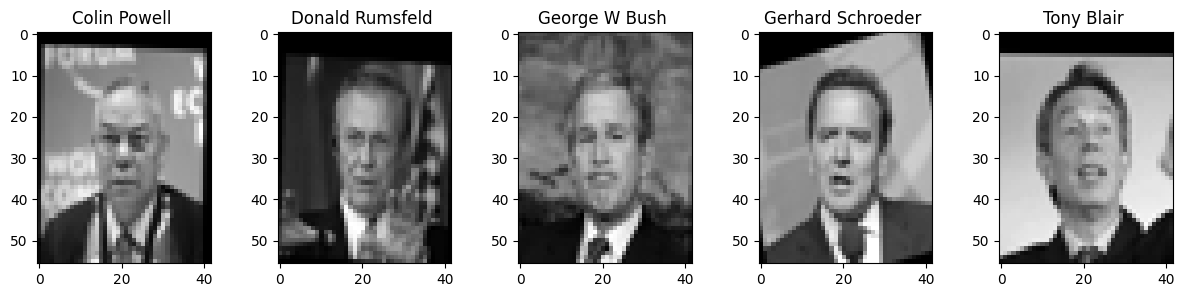

In [6]:
#Mostriamo una foto per ogniuno delle persone presenti nel dataset
face_data_df = pd.DataFrame(face_data)

face_targets_df = pd.DataFrame({'target': face_targets, 'target_names': [face_tnames[t] for t in face_targets]})

class_indices = {}

for name in face_tnames:
    class_indices[name] = face_targets_df.loc[face_targets_df['target_names']==name].index.to_list()

fig1, axs1 = plt.subplots(1, 3, figsize=(15, 3))

for i in range(len(face_tnames)):
    
    name = face_tnames[i]
    first_ind = class_indices[name][0]
    
    axs1[i].imshow(face_images[first_ind], cmap=plt.cm.gray)
    axs1[i].set_title('{} '.format(name))

#plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Problema della distribuzione delle immagini all'interno del dataset
introduzione al problema dell'oversampling per evitare overfitting 

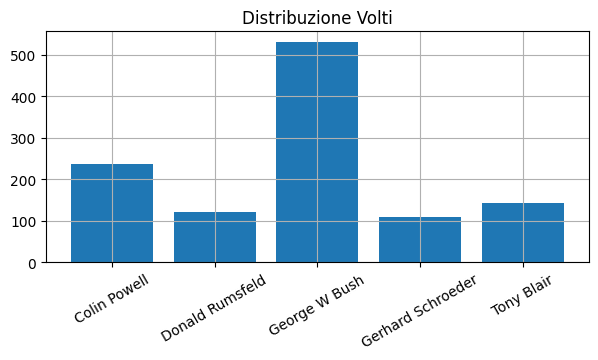

In [7]:
# Aggiunta codice tesina
face_df = np.asarray(face_targets)
_, counts = np.unique(face_df, return_counts=True)

plt.figure(figsize=(7, 3))
plt.title('Distribuzione Volti')
plt.bar(np.arange(len(face_tnames)), counts)
plt.xticks(np.arange(len(face_tnames)), labels = face_tnames, rotation = 30)
plt.grid()
plt.show()

In [8]:
random_state = 19990704 #np.random.randint(0, 100000)
print('random_seed = ', random_state)
test_p = 0.4
val_p = 0.25  # Percentuale di dati di X_trainval da usare come validation set

X_trainval, X_test, y_trainval, y_test, _, img_test = train_test_split(face_data, face_targets, face_images, test_size=test_p, random_state=random_state, shuffle=True)

display(pd.DataFrame({'X_trainval': X_trainval.shape, 'X_test': X_test.shape}, index=['N. sanmples', 'N.features']))

random_seed =  19990704


,X_trainval,X_test
N. sanmples,684,456
N.features,2352,2352


### Analisi distribuzione dei dati
Ora analizzo la Distribuzione delle classi nelle parti di test e di training e noto che il metodo mantiene la distribuzione delle classi invariata nelle due porzioni in cui a diviso il dataset; questo accade volontariamente per evitare di introdurre sbilanciamenti nel training e quindi un bias precedentemente assente nella distribuzione deii dati.


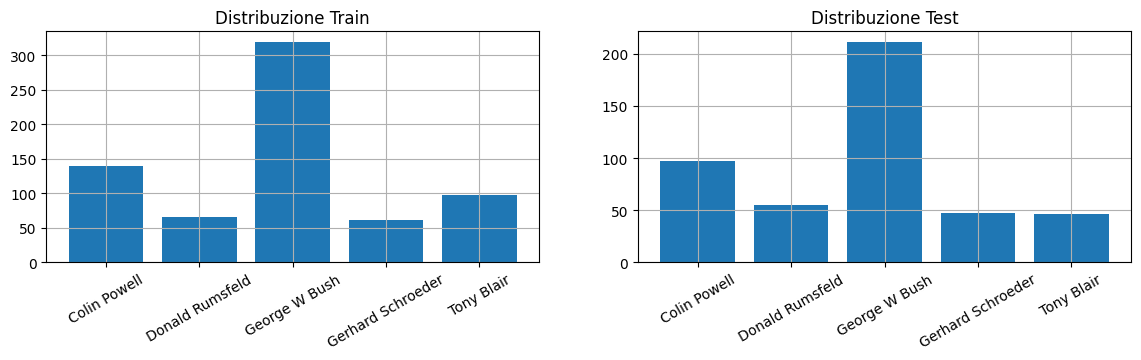

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].set_title('Distribuzione Train')

y_train_df = np.asarray(y_trainval)
_, counts_train = np.unique(y_train_df, return_counts=True)

axs[0].bar(np.arange(len(face_tnames)), counts_train)
axs[0].set_xticks(np.arange(len(face_tnames)))
axs[0].set_xticklabels(face_tnames, rotation=30)
axs[0].grid()

axs[1].set_title('Distribuzione Test')
y_test_df = np.asarray(y_test)
_, counts_test = np.unique(y_test_df, return_counts=True)

axs[1].bar(np.arange(len(face_tnames)), counts_test)
axs[1].set_xticks(np.arange(len(face_tnames)))
axs[1].set_xticklabels(face_tnames, rotation=30)
axs[1].grid()

plt.show()

### Oversampling
Essendo il dataset sbilanciato, ho deciso di applicare una tecnica di Oversampling casuale: in questo i dati delle classi che hanno meno istanze venogono riaggiunti al dataset in modo randomico in modo da pareggiare il numero di campioni presenti nella classe più numerosa;
durante l'analisi manterrò in parallelo i due approcci per vedere qual'è il più efficace

In [10]:
ros = RandomOverSampler(random_state= random_state)
X_trainval_ros, y_trainval_ros = ros.fit_resample(X_trainval, y_trainval)

Dopo l'OverSampling possiamo visualizzare la nuova distribuzione delle classi all'interno della porzione di dataset usata per l'addestramento

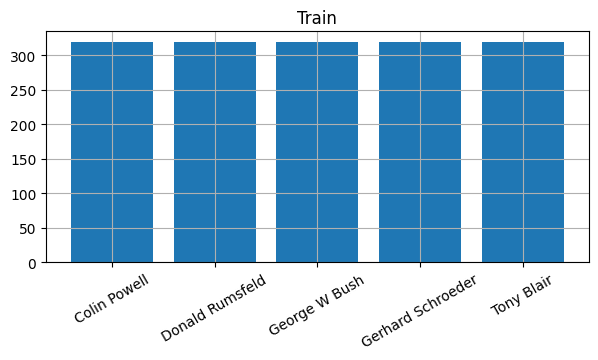

In [11]:
plt.figure(figsize=(7, 3))
plt.title('Train')

y_train_ros_df = pd.DataFrame(y_trainval_ros)

plt.bar(np.arange(len(face_tnames)), y_train_ros_df[0].value_counts(sort = False))
plt.xticks(np.arange(len(face_tnames)), labels = face_tnames, rotation = 30)
plt.grid()
plt.show()

### Risultati:
le classi hanno un pari numero di campioni ora e quindi, anche se molti campioni sono ripetuti senza variazioni, questo dovrebbe portare ad un miglioramento generale dell'accuratezza del N.N.

Ho pensato di applicare l'Oversampling dopo aver applicato la pca perché altrimenti questo avrebbe variato la varianza dei dati e quindi avrebbe alterato la scelta delle componenti principali 

# Prima Pipeline PCA + MLP

## PCA
In questo caso tutti i vettori hanno valori che rimangono sempre compresi tra lo 0 (Pixel Nero) e 255 (Pixel Bianco) quindi non si rende di nessuna utilità l'utilizzo di uno Standar Scaler dato che la varianza delle features è sempre uguale.

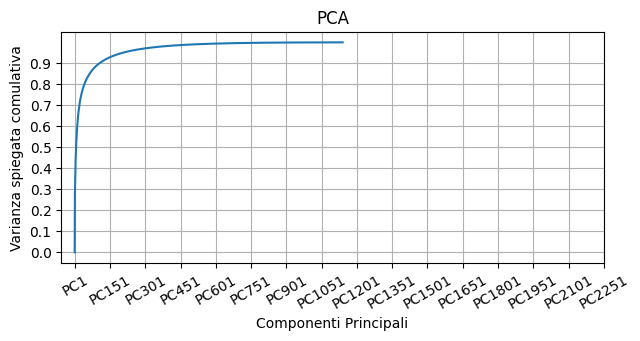

In [12]:
#parte sulla varianza
pca_global = PCA()

pca_global.fit(face_data)


expld_variance_global = np.insert(np.cumsum(pca_global.explained_variance_ratio_), 0, 0)

plt.figure(figsize=(7, 3))
plt.plot(expld_variance_global)
plt.title('PCA')
plt.xticks(ticks=np.arange(1, pca_global.n_features_ +1, 150),
           labels=[f'PC{i}' for i in range(1, pca_global.n_features_ +1, 150)],
           rotation=30)
plt.xlabel('Componenti Principali')
plt.yticks(ticks=np.arange(0, 1, 0.1))
plt.ylabel('Varianza spiegata comulativa')
plt.grid()
plt.show()

Commento sulla varianza mostrata dal grafico

### Eigenfaces

...

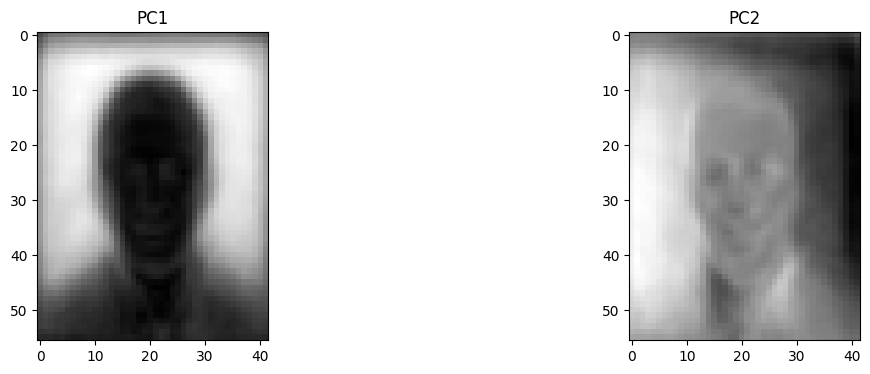

In [13]:
_, height, width = face_images.shape
eigenfaces = [pca_global.components_[i].reshape((height, width)) for i in [0, 1]]

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].set_title('PC1')
axs[0].imshow(eigenfaces[0], cmap = plt.cm.gray)
axs[1].set_title('PC2')
axs[1].imshow(eigenfaces[1], cmap = plt.cm.gray)
plt.show()

... commento immagini

### Applicazione al dataset

...spiegazione delle scelte prese

In [14]:
#PCA
pca = PCA(0.8)

pca.fit(X_trainval)

display(pd.DataFrame({'Numero PC': pca.n_components_, 
                      '% Varianza Tot. Spiegata': pca.explained_variance_ratio_.sum()}, 
                     index=['X_trainval']))

#backup dei dati per elaborazioni successive

X_trainval_b = X_trainval.copy()
X_trainval_ros_b = X_trainval_ros.copy()
X_test_b = X_test.copy()


X_trainval = pca.transform(X_trainval)
X_trainval_ros = pca.transform(X_trainval_ros)

X_test = pca.transform(X_test)

,Numero PC,% Varianza Tot. Spiegata
X_trainval,40,0.802526


## MLP
...

### inizializzazione

In [15]:
# Inizializzazione iper-parametri MLP
hidden_layer_sizes = [600]*2
activation = 'relu'
patience = 75
max_epochs = 5000
verbose = False
batch_sz = 4

# Inizializzazione MLP
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, batch_size=batch_sz, max_iter=max_epochs, early_stopping=True, n_iter_no_change=patience, random_state=random_state ,validation_fraction=val_p, solver= 'adam')

mlp_ros = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, batch_size=batch_sz, max_iter=max_epochs, early_stopping=True, n_iter_no_change=patience, random_state=random_state ,validation_fraction=val_p, solver= 'adam')

### Addestramento

In [16]:
# Addestramento MLP
mlp.fit(X_trainval, y_trainval)
mlp_ros.fit(X_trainval_ros, y_trainval_ros)

MLPClassifier(batch_size=4, early_stopping=True, hidden_layer_sizes=[600, 600],
              max_iter=5000, n_iter_no_change=75, random_state=19990704,
              validation_fraction=0.25)

### Testing

,Accuracy,Precision,Recall,F1
train. + val.,0.912281,0.912748,0.912281,0.911743
test,0.614035,0.599097,0.614035,0.600412


,Accuracy,Precision,Recall,F1
train. + val.,0.981818,0.981843,0.981818,0.981770
test,0.653509,0.654105,0.653509,0.642519


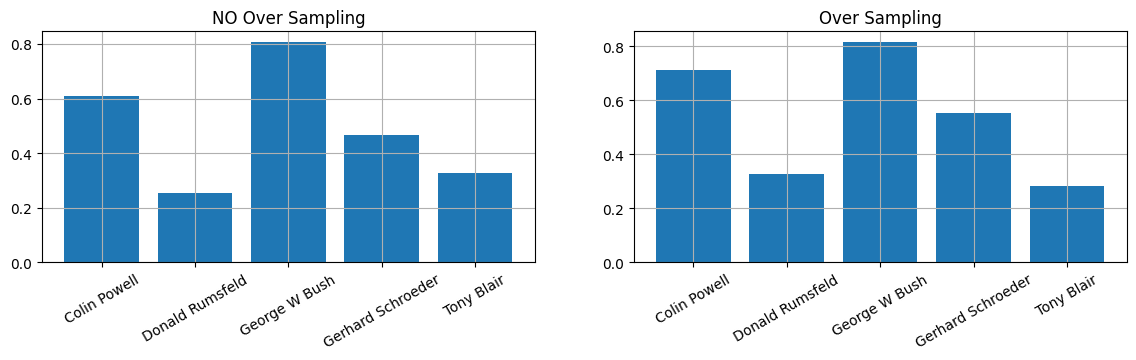

In [17]:
y_pred_trainval = mlp.predict(X_trainval)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_trainval, y_trainval)
prec_trainval = precision_score(y_trainval, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_trainval, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_trainval, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

cmat = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
cmat_norm_true = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=face_tnames, index=face_tnames)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=face_tnames, index=face_tnames)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=face_tnames, index=face_tnames)

y_pred_trainval_ros = mlp_ros.predict(X_trainval_ros)
y_pred_ros = mlp_ros.predict(X_test)

acc_trainval_ros = mlp_ros.score(X_trainval_ros, y_trainval_ros)
prec_trainval_ros = precision_score(y_trainval_ros, y_pred_trainval_ros, average='weighted')
rec_trainval_ros = recall_score(y_trainval_ros, y_pred_trainval_ros, average='weighted')
f1_trainval_ros = f1_score(y_trainval_ros, y_pred_trainval_ros, average='weighted')

acc_ros = mlp_ros.score(X_test, y_test)
prec_ros = precision_score(y_test, y_pred_ros, average='weighted')
rec_ros = recall_score(y_test, y_pred_ros, average='weighted')
f1_ros = f1_score(y_test, y_pred_ros, average='weighted')

df_perf_ros = pd.DataFrame({'Accuracy': [acc_trainval_ros, acc_ros], 
                        'Precision': [prec_trainval_ros, prec_ros], 
                        'Recall': [rec_trainval_ros, rec_ros],
                        'F1': [f1_trainval_ros, f1_ros]
                       },
                      index=['train. + val.', 'test'])

cmat_ros = confusion_matrix(y_test, y_pred_ros, labels=mlp.classes_)
cmat_norm_true_ros = confusion_matrix(y_test, y_pred_ros, labels=mlp.classes_, normalize='true')
cmat_norm_pred_ros = confusion_matrix(y_test, y_pred_ros, labels=mlp.classes_, normalize='pred')

display(df_perf)
display(df_perf_ros)

fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].set_title('NO Over Sampling')

axs[0].bar(np.arange(len(face_tnames)), [cmat_norm_true[t][t] for t in range(len(face_tnames))])
axs[0].set_xticks(np.arange(len(face_tnames)))
axs[0].set_xticklabels(face_tnames, rotation=30)
axs[0].grid()

axs[1].set_title('Over Sampling')

axs[1].bar(np.arange(len(face_tnames)), [cmat_norm_true_ros[t][t] for t in range(len(face_tnames))])
axs[1].set_xticks(np.arange(len(face_tnames)))
axs[1].set_xticklabels(face_tnames, rotation=30)
axs[1].grid()
#display(df_cmat)
#display(df_cmat_norm_true)
#display(df_cmat_norm_pred)

... Commento ai risultati e alla prestazione della rete

### Esempi
... cosa faccio negli esempi

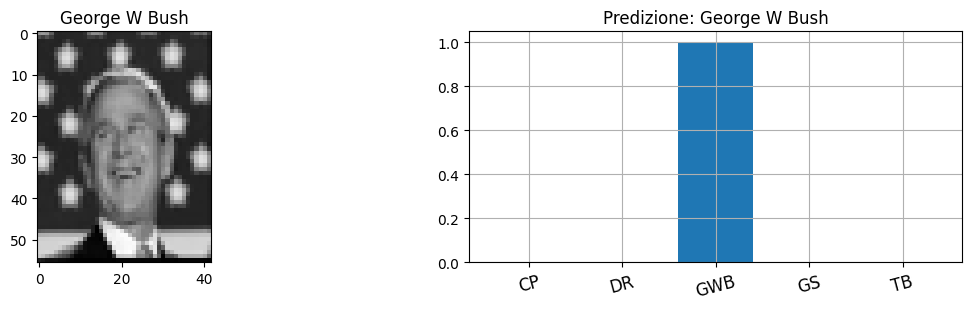

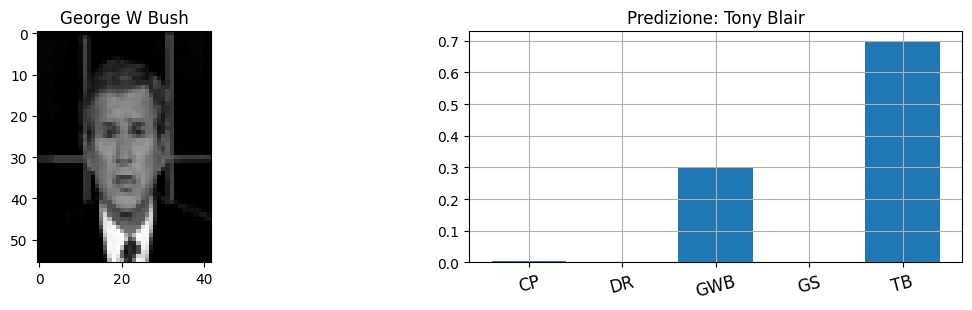

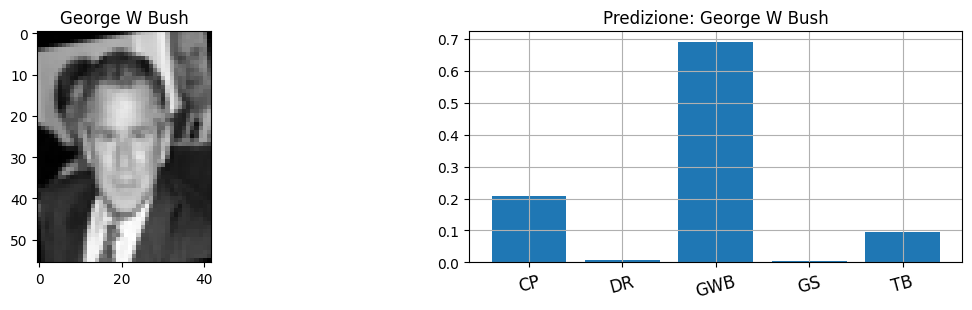

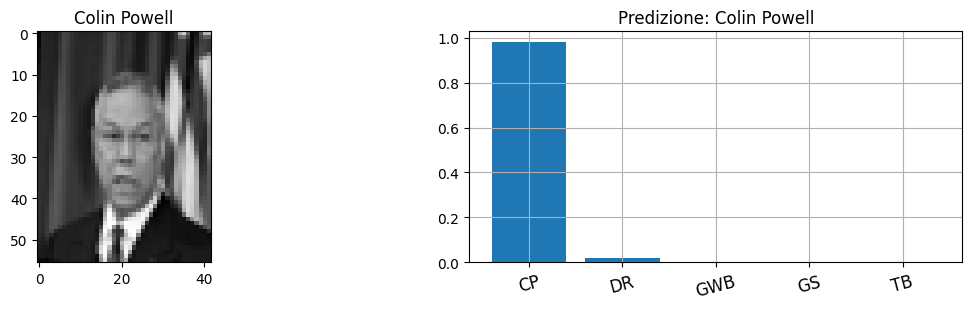

In [20]:
face_tnames_short = []
for name in face_tnames:
    name_split = name.split(' ')
    nm = ''
    for word in name_split:
        nm = nm + word[0]
    face_tnames_short.append(nm)

n_randsamples = 4
ind_test_rand = np.random.choice(len(face_targets), n_randsamples, replace=False)

rand_faces = face_data[ind_test_rand, :]
rand_targets = face_targets[ind_test_rand]

rand_faces_decision = mlp.predict_proba(pca.transform(rand_faces))
y_pred_rand_faces = mlp.predict(pca.transform(rand_faces))

for i in range(n_randsamples):
    fig, axs = plt.subplots(1, 2, figsize=(14, 3))
    ii = ind_test_rand[i]
    face_ii = face_images[ii]
    
    axs[0].imshow(face_ii, cmap=plt.cm.gray)
    axs[0].set_title('{}'.format(face_tnames[face_targets[ii]]))
    
    axs[1].bar(np.arange(len(face_tnames)),
               rand_faces_decision[i, :]
              )
    axs[1].grid()
    axs[1].set_xticks(np.arange(len(face_tnames)))
    axs[1].set_xticklabels(face_tnames_short,
                           rotation=15,
                           fontsize=12
                          )
    axs[1].set_title('Predizione: {}'.format(face_tnames[y_pred_rand_faces[i]]))
    
plt.show()

### Risultati
Possiamo notare come, il NN addestrato senza oversampling, abbia una prestazione peggiore in quasi tutti gli aspetti; solamente nel caso di Schroeder si è verificato un peggiornamento della capacità predittiva, in tutti gli altri casi invece (soprattutto per le classi che originariamente avevano meno campioni) si è verificato un miglioramento.
Per ulteriormente verificare il funzionamento dell'Oversampling ho creato due Grafici che mostrano il numero di "Guess" errati che ogni classe ha ricevuto:

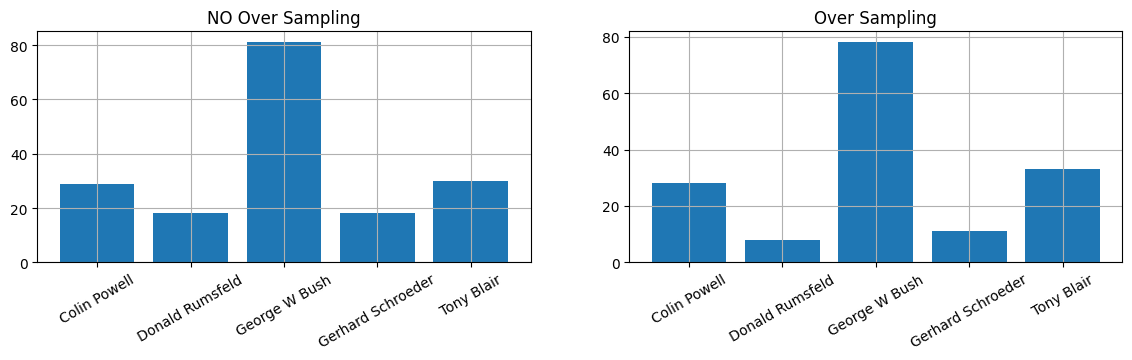

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].set_title('NO Over Sampling')

axs[0].bar(np.arange(len(face_tnames)), [np.sum(cmat[:,t]) -cmat[t][t] for t in range(len(face_tnames))])
axs[0].set_xticks(np.arange(len(face_tnames)))
axs[0].set_xticklabels(face_tnames, rotation=30)
axs[0].grid()

axs[1].set_title('Over Sampling')

axs[1].bar(np.arange(len(face_tnames)), [np.sum(cmat_ros[:,t]) -cmat_ros[t][t] for t in range(len(face_tnames))])
axs[1].set_xticks(np.arange(len(face_tnames)))
axs[1].set_xticklabels(face_tnames, rotation=30)
axs[1].grid()

plt.show()

Si può chiaramente notare che il numero di errore si distribuisce più equamente nelle classi e non interessa più così maggiormente le classi i cui campioni compaiono i modo molto più significativo

# Seconda Pipeline PCA + FDA
...

## PCA

il ruolo della pca in questa pipline

In [ ]:
# reset delle variabili allo stato precedente alle trasformazioni della prima pipeline
X_trainval = X_trainval_b
X_trainval_ros = X_trainval_ros_b
X_test = X_test_b

#normal
n_components_pca = X_trainval.shape[0] - face_tnames.shape[0]
pca = PCA(n_components= n_components_pca)
pca_data = pca.fit_transform(X_trainval)

# oversapled data
n_components_pca_ros = X_trainval_ros.shape[0] - face_tnames.shape[0]
pca_ros = PCA(n_components= n_components_pca_ros)
pca_data_ros = pca_ros.fit_transform(X_trainval_ros)

## FDA
...


In [ ]:
#FDA

#normal
n_components_fda = face_tnames.shape[0]-1
fda = FDA(n_components_fda)
fda.fit(pca_data, y_trainval)
fda_data = fda.transform(pca_data)

print('NO Oversampling Dimensionalità Dati: ' , X_trainval.shape[1])
print('NO Oversampling Dimensionalità PCA: ' , n_components_pca)
print('NO Oversampling Dimensionalità FDA: ' , n_components_fda)

#oversampled
fda_ros = FDA(n_components_fda)
fda_ros.fit(pca_data_ros, y_trainval_ros)
fda_data_ros = fda_ros.transform(pca_data_ros)

print('Oversampling Dimensionalità Dati: ' , X_trainval_ros.shape[1])
print('Oversampling Dimensionalità PCA: ' , n_components_pca_ros)
print('Oversampling Dimensionalità FDA: ' , n_components_fda)

### Testing

In [ ]:
#Valutazione del dataset usato per il training
y_pred_trainval = fda.predict(pca_data)
y_pred_trainval_ros = fda_ros.predict(pca_data_ros)

#valutazine del dataset nuovo
pca_X_test = pca.transform(X_test)
pca_X_test_ros = pca_ros.transform(X_test)

y_pred = fda.predict(pca_X_test)
y_pred_ros = fda_ros.predict(pca_X_test_ros)

acc_trainval = fda.score(pca_data, y_trainval)
prec_trainval = precision_score(y_trainval, y_pred_trainval, average='weighted', zero_division=0)
rec_trainval = recall_score(y_trainval, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_trainval, y_pred_trainval, average='weighted')

acc = fda.score(pca_X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({ 'Accuracy': [acc_trainval, acc],
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])
display(df_perf)

cmat_fda = confusion_matrix(y_test, y_pred)
cmat_fda_norm_true = confusion_matrix(y_test, y_pred, normalize='true')
cmat_fda_norm_pred = confusion_matrix(y_test, y_pred, normalize='pred')

df_cmat_fda = pd.DataFrame(cmat_fda, columns=face_tnames, index=face_tnames)
df_cmat_fda_norm_true = pd.DataFrame(cmat_fda_norm_true, columns=face_tnames, index=face_tnames)
df_cmat_fda_norm_pred = pd.DataFrame(cmat_fda_norm_pred, columns=face_tnames, index=face_tnames)

#display(df_cmat_fda)
#display(df_cmat_fda_norm_true)
#display(df_cmat_fda_norm_pred)

In [ ]:
ros_acc_trainval = fda_ros.score(pca_data_ros, y_trainval_ros)
ros_prec_trainval = precision_score(y_trainval_ros, y_pred_trainval_ros, average='weighted', zero_division=0)
ros_rec_trainval = recall_score(y_trainval_ros, y_pred_trainval_ros, average='weighted')
ros_f1_trainval = f1_score(y_trainval_ros, y_pred_trainval_ros, average='weighted')

ros_acc = fda_ros.score(pca_X_test_ros, y_test)
ros_prec = precision_score(y_test, y_pred_ros, average='weighted', zero_division=0)
ros_rec = recall_score(y_test, y_pred_ros, average='weighted')
ros_f1 = f1_score(y_test, y_pred_ros, average='weighted')

df_perf_fda_ros = pd.DataFrame({ 'Accuracy': [ros_acc_trainval, ros_acc],
                        'Precision': [ros_prec_trainval, ros_prec], 
                        'Recall': [ros_rec_trainval, ros_rec],
                        'F1': [ros_f1_trainval, ros_f1]
                       },
                      index=['train. + val.', 'test'])
display(df_perf_fda_ros)

cmat_fda_ros = confusion_matrix(y_test, y_pred_ros)
cmat_fda_ros_norm_true = confusion_matrix(y_test, y_pred_ros, normalize='true')
cmat_fda_ros_norm_pred = confusion_matrix(y_test, y_pred_ros, normalize='pred')

df_cmat_fda_ros = pd.DataFrame(cmat_fda_ros, columns=face_tnames, index=face_tnames)
df_cmat_fda_ros_norm_true = pd.DataFrame(cmat_fda_ros_norm_true, columns=face_tnames, index=face_tnames)
df_cmat_fda_ros_norm_pred = pd.DataFrame(cmat_fda_ros_norm_pred, columns=face_tnames, index=face_tnames)

#display(df_cmat_fda_ros)
#display(df_cmat_fda_ros_norm_true)
#display(df_cmat_fda_ros_norm_pred)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].set_title('NO Over Sampling')

axs[0].bar(np.arange(len(face_tnames)), [cmat_fda_norm_true[t][t] for t in range(len(face_tnames))])
axs[0].set_xticks(np.arange(len(face_tnames)))
axs[0].set_xticklabels(face_tnames, rotation=30)
axs[0].grid()

axs[1].set_title('Over Sampling')

axs[1].bar(np.arange(len(face_tnames)), [cmat_fda_ros_norm_true[t][t] for t in range(len(face_tnames))])
axs[1].set_xticks(np.arange(len(face_tnames)))
axs[1].set_xticklabels(face_tnames, rotation=30)
axs[1].grid()

## Kernel PCA
Alternativamente al metodo precedente usiamo la kernel pca per ridurre la dimensionalità dei dati e analizzarli successivamente con FDA per capire se è possibile un ulteriore miglioramento delle prestazioni

### Grid Serch
Per capire quale kernel performa meglio per il nostro obittivo e quali paramentri utilizzare per ottimizzarlo, adottiamo la tecnica di Grid Serch. Per poter usare il metodo importato dal pacchetto scikitleaen ho dovuto riadattare la funzione dell'FDA all'interfaccia del pacchetto e includere nella stessa funzione sia la trasformazione della PCA che la FDA.

Grid serach originaria include più parametri ma per brevita riporto solamente quella con i parametri migliori

In [ ]:

parameters = {
    'fda_components': [n_components_fda],
    'kernel':['rbf', 'poly', 'sigmoid', 'cosine'], #possibili Kernel tra quelli da testare nelle performance
    'k_degree':[3, 4, 5],
    'k_gamma':[None],
    'k_coef0':[0.55, 0.6, 0.65, 0.7]}
fda_grid = KPCA_FDA() #Nuova funzione che ha all'interno entrambe le trasformazioni
clf = GridSearchCV(fda_grid, parameters, error_score='raise')
clf.fit(X_trainval, y_trainval, error_score='raise')

clf_ros = GridSearchCV(fda_grid, parameters, error_score='raise')
clf_ros.fit(X_trainval_ros, y_trainval_ros, error_score='raise')

print(clf.best_params_)
print(clf_ros.best_params_)

In [ ]:
clf_risults = pd.DataFrame(clf.cv_results_)[['mean_fit_time', 'param_k_coef0', 'param_k_degree', 'param_kernel','mean_test_score', 'rank_test_score']]
display(clf_risults.sort_values(by=['rank_test_score'])[0:4])
clf_risults_ros = pd.DataFrame(clf_ros.cv_results_)[['mean_fit_time', 'param_k_coef0', 'param_k_degree', 'param_kernel','mean_test_score', 'rank_test_score']]
display(clf_risults_ros.sort_values(by=['rank_test_score'])[0:4])

Commento ai risultati della grid serach
### Addestramento con i paramentri ottimi


In [ ]:
#FDA

#normal
kpca_fda = KPCA_FDA(**clf.best_params_)
kpca_fda.fit(X_trainval, y_trainval)

#oversampled
kpca_fda_ros = KPCA_FDA(**clf_ros.best_params_) #migliori parametri trovati per il Random Oversampling
kpca_fda_ros.fit(X_trainval_ros, y_trainval_ros)


y_p = kpca_fda.predict(X_test)
y_p_t = kpca_fda.predict(X_trainval)

a_t = kpca_fda.score(X_trainval, y_trainval) #accuracy train
p_t = precision_score(y_trainval, y_p_t, average='weighted', zero_division=0) #precision train
r_t = recall_score(y_trainval, y_p_t, average='weighted') #recall train
f1_t = f1_score(y_trainval, y_p_t, average='weighted') #f1 train

a = kpca_fda.score(X_test, y_test) #accuracy
p = precision_score(y_test, y_p, average='weighted', zero_division=0) #precision
r = recall_score(y_test, y_p, average='weighted') #recall
f1 = f1_score(y_test, y_p, average='weighted') #f1

df_p = pd.DataFrame({ 'Accuracy': [a_t, a],
                        'Precision': [p_t, p], 
                        'Recall': [r_t, r],
                        'F1': [f1_t, f1]
                       },
                      index=['Training Set', 'Test Set'])

y_p_ros = kpca_fda_ros.predict(X_test)
y_p_t_ros = kpca_fda_ros.predict(X_trainval_ros)

a_t_ros = kpca_fda_ros.score(X_trainval_ros, y_trainval_ros) #accuracy train
p_t_ros = precision_score(y_trainval_ros, y_p_t_ros, average='weighted', zero_division=0) #precision train
r_t_ros = recall_score(y_trainval_ros, y_p_t_ros, average='weighted') #recall train
f1_t_ros = f1_score(y_trainval_ros, y_p_t_ros, average='weighted') #f1 train

a_ros = kpca_fda_ros.score(X_test, y_test) #accuracy
p_ros = precision_score(y_test, y_p_ros, average='weighted', zero_division=0) #precision
r_ros = recall_score(y_test, y_p_ros, average='weighted') #recall
f1_ros = f1_score(y_test, y_p_ros, average='weighted') #f1

df_p_ros = pd.DataFrame({ 'Accuracy': [a_t_ros, a_ros],
                        'Precision': [p_t_ros, p_ros], 
                        'Recall': [r_t_ros, r_ros],
                        'F1': [f1_t_ros, f1_ros]
                       },
                      index=['Oversampling Training Set', 'Oversampling Test Set'])

display(pd.concat([df_p, df_p_ros]))

cmat_kfda_norm_true = confusion_matrix(y_test, y_p, normalize='true')
cmat_kfda_ros_norm_true = confusion_matrix(y_test, y_p_ros, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].set_title('NO OverSampling')

axs[0].bar(np.arange(len(face_tnames)), [cmat_kfda_norm_true[t][t] for t in range(len(face_tnames))])
axs[0].set_xticks(np.arange(len(face_tnames)))
axs[0].set_xticklabels(face_tnames, rotation=30)
axs[0].grid()

axs[1].set_title('OverSampling')

axs[1].bar(np.arange(len(face_tnames)), [cmat_kfda_ros_norm_true[t][t] for t in range(len(face_tnames))])
axs[1].set_xticks(np.arange(len(face_tnames)))
axs[1].set_xticklabels(face_tnames, rotation=30)
axs[1].grid()